 ### 1) Watch these two videos on neural networks:
 * https://www.youtube.com/watch?v=bfmFfD2RIcg
 * https://www.youtube.com/watch?v=wQ8BIBpya2k

### 2) Install and import sklearn, pandas, numpy, seaborn, keras (from tensorflow)

In [6]:
# import necessary packages
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import keras as ks

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

### 3) Download the churn dataset and read it in with pd.read_csv()
https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [7]:
# read in churn dataset
df = pd.read_csv(r'C:\Users\mreed\OneDrive - CAPTECH VENTURES INC\MLExplorers\Datasets\ChurnDataset\Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 4) Remove RowNumber, CustomerID, Surname (not needed or useful)

In [8]:
# Remove RowNumber, CustomerId, Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 5) Split data into features and response (Response is Exited)

In [9]:
features = df.drop(['Exited'], axis=1)
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
# set the response (Y) to the Exited column
Y = df['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### 6) Use OneHotEncoder from sklearn for gender and geography

In [11]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
encode = df.filter(["Geography","Gender"], axis=1)
encode

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [14]:
# Use OneHotEncoder from sklearn for gender and geography

# create an encoder and fit the dataframe
enc = OneHotEncoder(sparse=False).fit(encode)
encoded = enc.transform(encode)

# convert it to a dataframe
encoded_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
encoded_df.head()

C:\Users\mreed\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


### 7) Drop original geography and gender columns as they are no longer needed

In [15]:
# add the encoded categorical variables to the dataframe and drop the original Geography and Gender columns
features = pd.concat([features, encoded_df], axis=1)
features = features.drop(["Geography","Gender"], axis=1)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


### 8) Apply standard scaler to all numeric factors

In [16]:
# scale the numeric columns
scaler = StandardScaler()

# numeric columns to be scaled:
ft_scale = features.filter(["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"], axis= 1)

# scale the columns with StandardScaler
sc = scaler.fit(ft_scale)
features_sc = sc.transform(ft_scale)

# convert it to a dataframe
features_scdf = pd.DataFrame(
     features_sc, 
     columns=sc.get_feature_names_out()
)
features_scdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


In [17]:
# create the final features dataframe (X) with the scaled numeric values, binary columns and encoded columns
features1 = features.filter(["HasCrCard","IsActiveMember"], axis=1)
X = pd.concat([features_scdf, features1, encoded_df], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,1,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,0,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,1,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,1,0,1.0,0.0,0.0,0.0,1.0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,1,1,1.0,0.0,0.0,0.0,1.0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,0,1,1.0,0.0,0.0,1.0,0.0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,1,0,0.0,1.0,0.0,0.0,1.0


### 9) Split the data into test/train sets

In [18]:
# split the data into train and test with 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)
  
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
      CreditScore       Age    Tenure   Balance  NumOfProducts  \
9919     0.387706 -1.232140 -1.733315 -1.225848       0.807737   
7994    -1.360899 -1.708908 -1.387538  1.205488       2.527057   
3564     2.032843  1.151700 -0.004426  0.337849      -0.911583   
6734    -0.326221  1.533114 -1.733315 -1.225848       2.527057   
1588     0.998166  2.105236  0.687130  1.273951      -0.911583   

      EstimatedSalary  HasCrCard  IsActiveMember  Geography_France  \
9919         0.099024          1               0               1.0   
7994         1.218072          1               1               0.0   
3564         0.766747          0               0               1.0   
6734        -0.683033          0               0               1.0   
1588         0.825352          0               1               1.0   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
9919                0.0              0.0            0.0          1.0  
7994                1.0      

### 10) Build a 3 layer network
* Training a model means searching for the best parameters in a mathematical formula that minimize the error of your predictions.
* Activation function defines the output of that node.
* Too many hidden layers will lead to overfitting

In [19]:
# build a three layer neural network

model = Sequential()
# sequential model is a linear stack of layers - main task is to arrange the layers in sequential order

model.add(Dense(6, input_shape=(13,))) #input layer - we have 13 features
# number of neurons should be between the size of the input layer and the size of the output layer
# -- in this case we chose 6 neurons

model.add(Activation('sigmoid')) #sigmoid is frequently used for classification
# sigmoid(x) = 1 / (1 + exp(-x))

model.add(Dense(6)) #hidden layer - useful to overcome nonlinearity of data
# the Dense layer is a layer of neurons in which each neuron receives input from all the neurons of previous layer

model.add(Activation('sigmoid'))

model.add(Dense(1)) #output layer

model.add(Activation('sigmoid'))

In [20]:
# config the model with losses and metrics
model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# binary_crossentropy is a binary classification loss function 
# -- intended for use with binary classification where the target values are 0 or 1

# An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rates
# -- improving the overall loss and accuracy
# adam optimizer used the adam algorithm and is a stochastic gradient descent method that is recommended as the default optimizer

In [21]:
# train the model
model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 2, validation_split  = 0.2)
# the higher the batch size, the more memory space needed
# an epoch is one pass over the full training set
model.summary() # summary function provides a snapshot of the structure and the size
# should see the metrics improving and the loss decreasing epoch by epoch

Epoch 1/100
640/640 - 3s - loss: 0.4993 - accuracy: 0.7984 - val_loss: 0.4895 - val_accuracy: 0.7925 - 3s/epoch - 5ms/step
Epoch 2/100
640/640 - 1s - loss: 0.4707 - accuracy: 0.7984 - val_loss: 0.4706 - val_accuracy: 0.7925 - 1s/epoch - 2ms/step
Epoch 3/100
640/640 - 1s - loss: 0.4494 - accuracy: 0.7984 - val_loss: 0.4539 - val_accuracy: 0.7925 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 1s - loss: 0.4336 - accuracy: 0.7984 - val_loss: 0.4436 - val_accuracy: 0.7994 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 1s - loss: 0.4250 - accuracy: 0.8037 - val_loss: 0.4392 - val_accuracy: 0.8056 - 1s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.4202 - accuracy: 0.8106 - val_loss: 0.4352 - val_accuracy: 0.8100 - 980ms/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.4170 - accuracy: 0.8156 - val_loss: 0.4335 - val_accuracy: 0.8125 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.4143 - accuracy: 0.8200 - val_loss: 0.4317 - val_accuracy: 0.8163 - 1s/epoch - 2ms/step
Epoch 9/100
6

640/640 - 1s - loss: 0.3858 - accuracy: 0.8413 - val_loss: 0.4126 - val_accuracy: 0.8344 - 1s/epoch - 2ms/step
Epoch 68/100
640/640 - 1s - loss: 0.3856 - accuracy: 0.8409 - val_loss: 0.4123 - val_accuracy: 0.8338 - 1s/epoch - 2ms/step
Epoch 69/100
640/640 - 1s - loss: 0.3855 - accuracy: 0.8423 - val_loss: 0.4138 - val_accuracy: 0.8319 - 1s/epoch - 2ms/step
Epoch 70/100
640/640 - 1s - loss: 0.3853 - accuracy: 0.8406 - val_loss: 0.4114 - val_accuracy: 0.8306 - 1s/epoch - 2ms/step
Epoch 71/100
640/640 - 1s - loss: 0.3853 - accuracy: 0.8411 - val_loss: 0.4114 - val_accuracy: 0.8306 - 1s/epoch - 2ms/step
Epoch 72/100
640/640 - 1s - loss: 0.3850 - accuracy: 0.8413 - val_loss: 0.4129 - val_accuracy: 0.8319 - 1s/epoch - 2ms/step
Epoch 73/100
640/640 - 2s - loss: 0.3846 - accuracy: 0.8400 - val_loss: 0.4155 - val_accuracy: 0.8319 - 2s/epoch - 2ms/step
Epoch 74/100
640/640 - 1s - loss: 0.3846 - accuracy: 0.8409 - val_loss: 0.4128 - val_accuracy: 0.8344 - 1s/epoch - 2ms/step
Epoch 75/100
640/640 

### 11) Predict the responses in your test set and plot it with a confusion matrix

63/63 [==============================] - 0s 1ms/step


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix')]

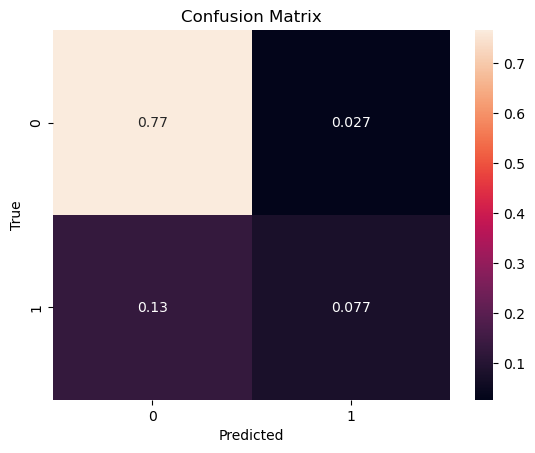

In [30]:
# use the model to do prediction and plot it with a confusion matrix

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

# confusion matrix link: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
conf_matrix = sk.metrics.confusion_matrix(y_test.values, y_pred)
s= sns.heatmap(conf_matrix/np.sum(conf_matrix),annot = True)
s.set(xlabel='Predicted', ylabel='True', title='Confusion Matrix')

### Try out different numbers of hidden layers for fun!

In [31]:
# build a four layer neural network
model2 = Sequential()
model2.add(Dense(6, input_shape=(13,))) #input layer - we have 13 features
model2.add(Activation('sigmoid'))
model2.add(Dense(6)) #hidden layer
model2.add(Activation('sigmoid'))
model2.add(Dense(6)) #hidden layer
model2.add(Activation('sigmoid'))
model2.add(Dense(1)) #output layer
model2.add(Activation('sigmoid'))

In [33]:
# config the model with losses and metrics
model2.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [34]:
# train the model
model2.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 2, validation_split  = 0.2)
model2.summary() # summary function provides a snapshot of the structure and the size

Epoch 1/100
640/640 - 3s - loss: 0.5148 - accuracy: 0.7984 - val_loss: 0.5041 - val_accuracy: 0.7925 - 3s/epoch - 5ms/step
Epoch 2/100
640/640 - 1s - loss: 0.4854 - accuracy: 0.7984 - val_loss: 0.4804 - val_accuracy: 0.7925 - 1s/epoch - 2ms/step
Epoch 3/100
640/640 - 1s - loss: 0.4522 - accuracy: 0.7984 - val_loss: 0.4511 - val_accuracy: 0.7925 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 1s - loss: 0.4305 - accuracy: 0.7984 - val_loss: 0.4422 - val_accuracy: 0.7925 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 2s - loss: 0.4239 - accuracy: 0.7978 - val_loss: 0.4395 - val_accuracy: 0.7919 - 2s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.4222 - accuracy: 0.7972 - val_loss: 0.4388 - val_accuracy: 0.8012 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.4211 - accuracy: 0.8047 - val_loss: 0.4378 - val_accuracy: 0.8062 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.4202 - accuracy: 0.8069 - val_loss: 0.4369 - val_accuracy: 0.8119 - 1s/epoch - 2ms/step
Epoch 9/100
640/

Epoch 68/100
640/640 - 1s - loss: 0.3871 - accuracy: 0.8398 - val_loss: 0.4139 - val_accuracy: 0.8275 - 1s/epoch - 2ms/step
Epoch 69/100
640/640 - 1s - loss: 0.3874 - accuracy: 0.8384 - val_loss: 0.4150 - val_accuracy: 0.8275 - 1s/epoch - 2ms/step
Epoch 70/100
640/640 - 2s - loss: 0.3869 - accuracy: 0.8397 - val_loss: 0.4138 - val_accuracy: 0.8275 - 2s/epoch - 2ms/step
Epoch 71/100
640/640 - 2s - loss: 0.3869 - accuracy: 0.8391 - val_loss: 0.4142 - val_accuracy: 0.8294 - 2s/epoch - 3ms/step
Epoch 72/100
640/640 - 2s - loss: 0.3863 - accuracy: 0.8384 - val_loss: 0.4135 - val_accuracy: 0.8250 - 2s/epoch - 3ms/step
Epoch 73/100
640/640 - 2s - loss: 0.3859 - accuracy: 0.8392 - val_loss: 0.4135 - val_accuracy: 0.8281 - 2s/epoch - 3ms/step
Epoch 74/100
640/640 - 1s - loss: 0.3858 - accuracy: 0.8380 - val_loss: 0.4136 - val_accuracy: 0.8269 - 1s/epoch - 2ms/step
Epoch 75/100
640/640 - 1s - loss: 0.3851 - accuracy: 0.8417 - val_loss: 0.4178 - val_accuracy: 0.8300 - 1s/epoch - 2ms/step
Epoch 76

63/63 [==============================] - 0s 2ms/step


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix')]

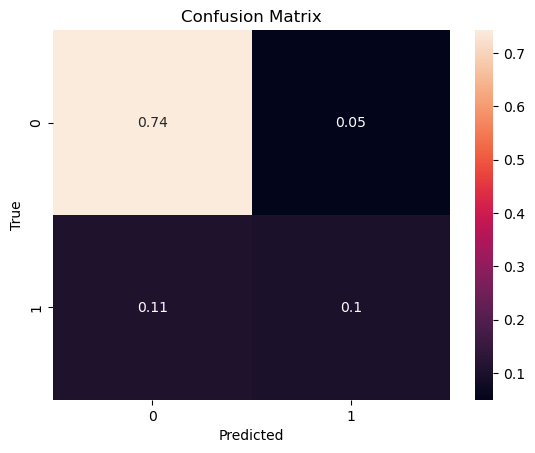

In [35]:
# import pylab as plt
# use the model to do prediction and plot it with a confusion matrix

y_pred = model2.predict(X_test)
y_pred = (y_pred>0.5)

# confusion matrix link: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
conf_matrix = sk.metrics.confusion_matrix(y_test.values, y_pred)
s= sns.heatmap(conf_matrix/np.sum(conf_matrix),annot = True)
s.set(xlabel='Predicted', ylabel='True', title='Confusion Matrix')

### Try more neurons!

In [36]:
model3 = Sequential()
model3.add(Dense(7, input_shape=(13,))) #input layer - we have 13 features
model3.add(Activation('sigmoid')) #sigmoid is frequently used for classification
model3.add(Dense(7)) #hidden layer
model3.add(Activation('sigmoid'))
model3.add(Dense(1)) #output layer
model3.add(Activation('sigmoid'))

In [38]:
model3.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [39]:
model3.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 2, validation_split  = 0.2)
model3.summary() # summary function provides a snapshot of the structure and the size

Epoch 1/100
640/640 - 3s - loss: 0.5158 - accuracy: 0.7889 - val_loss: 0.4868 - val_accuracy: 0.7925 - 3s/epoch - 4ms/step
Epoch 2/100
640/640 - 1s - loss: 0.4646 - accuracy: 0.7984 - val_loss: 0.4594 - val_accuracy: 0.7925 - 1s/epoch - 2ms/step
Epoch 3/100
640/640 - 1s - loss: 0.4407 - accuracy: 0.7973 - val_loss: 0.4444 - val_accuracy: 0.8000 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 1s - loss: 0.4291 - accuracy: 0.8034 - val_loss: 0.4397 - val_accuracy: 0.8050 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 1s - loss: 0.4240 - accuracy: 0.8066 - val_loss: 0.4365 - val_accuracy: 0.8056 - 1s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.4211 - accuracy: 0.8087 - val_loss: 0.4348 - val_accuracy: 0.8044 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.4183 - accuracy: 0.8116 - val_loss: 0.4342 - val_accuracy: 0.8106 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 2s - loss: 0.4163 - accuracy: 0.8145 - val_loss: 0.4315 - val_accuracy: 0.8112 - 2s/epoch - 2ms/step
Epoch 9/100
640/

Epoch 68/100
640/640 - 1s - loss: 0.3537 - accuracy: 0.8559 - val_loss: 0.3711 - val_accuracy: 0.8494 - 1s/epoch - 2ms/step
Epoch 69/100
640/640 - 1s - loss: 0.3530 - accuracy: 0.8561 - val_loss: 0.3713 - val_accuracy: 0.8487 - 1s/epoch - 2ms/step
Epoch 70/100
640/640 - 2s - loss: 0.3524 - accuracy: 0.8566 - val_loss: 0.3691 - val_accuracy: 0.8525 - 2s/epoch - 3ms/step
Epoch 71/100
640/640 - 2s - loss: 0.3515 - accuracy: 0.8578 - val_loss: 0.3693 - val_accuracy: 0.8544 - 2s/epoch - 3ms/step
Epoch 72/100
640/640 - 2s - loss: 0.3511 - accuracy: 0.8562 - val_loss: 0.3683 - val_accuracy: 0.8500 - 2s/epoch - 2ms/step
Epoch 73/100
640/640 - 1s - loss: 0.3507 - accuracy: 0.8567 - val_loss: 0.3702 - val_accuracy: 0.8487 - 1s/epoch - 2ms/step
Epoch 74/100
640/640 - 2s - loss: 0.3502 - accuracy: 0.8573 - val_loss: 0.3701 - val_accuracy: 0.8469 - 2s/epoch - 3ms/step
Epoch 75/100
640/640 - 2s - loss: 0.3496 - accuracy: 0.8562 - val_loss: 0.3693 - val_accuracy: 0.8494 - 2s/epoch - 2ms/step
Epoch 76

63/63 [==============================] - 0s 1ms/step


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix')]

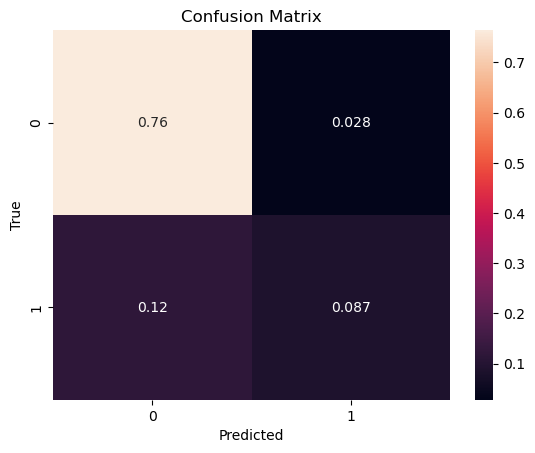

In [40]:
y_pred = model3.predict(X_test)
y_pred = (y_pred>0.5)

# confusion matrix link: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
conf_matrix = sk.metrics.confusion_matrix(y_test.values, y_pred)
s= sns.heatmap(conf_matrix/np.sum(conf_matrix),annot = True)
s.set(xlabel='Predicted', ylabel='True', title='Confusion Matrix')